<a href="https://colab.research.google.com/github/Kzis/ml-project/blob/master/k_mean1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from copy import deepcopy
import numpy as np
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# load dataset
data = load_wine()
X = data.data #attribute class
y = data.target #label class

wine = pd.DataFrame(X, columns=data.feature_names) #convert numpy for show
print(data.target_names)
print(wine.shape) #show attr class (rec,col)
wine.head()


['class_0' 'class_1' 'class_2']
(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [58]:
#create model
model = KMeans(n_clusters=3, init = 'random', max_iter = 100, random_state = 5)
kmeans = model.fit(X)
kmeans

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=100, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=5,
       tol=0.0001, verbose=0)

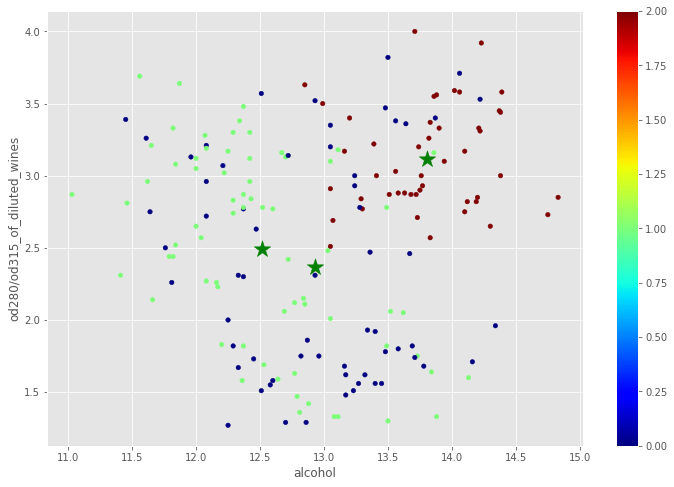

In [59]:
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns =data.feature_names)

fig, ax = plt.subplots(1, 1)
wine.plot.scatter(x = 'alcohol', y = 'od280/od315_of_diluted_wines', c= kmeans.labels_, figsize=(12,8), colormap='jet', ax=ax, mark_right=False)

centroids_df.plot.scatter(x = 'alcohol', y = 'od280/od315_of_diluted_wines', ax = ax,  s = 300, marker='*',c='g')